This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Here are only physicochemical (inputs) and sensory (the output) variables(e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The input features are as follows:

- fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily);
- volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;
- citric acid - found in small quantities, citric acid can add ‘freshness’ and flavor to wines;
- residual sugar - the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter
  and wines with greater than 45 grams/liter are considered sweet;
- chlorides - the amount of salt in the wine;
- free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion;   it prevents microbial growth and the oxidation of wine;
- total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but 
  at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine;
- density - the density of water is close to that of water depending on the percent alcohol and sugar content;
- pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on 
  the pH scale;
- sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and 
  antioxidant
- alcohol - the percent alcohol content of the wine;

The output feature is:

- quality - output variable (based on sensory data, score between 0 and 10);

Goal: Creating a Classification model to predict quality of red wines according to the several features and calculating test scores.

In [124]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Reading CSV Data
data = pd.read_csv("wineQuality.csv")

In [126]:
#Get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1582 non-null float64
volatile acidity        1569 non-null float64
citric acid             1558 non-null float64
residual sugar          1570 non-null float64
chlorides               1570 non-null float64
free sulfur dioxide     1582 non-null float64
total sulfur dioxide    1586 non-null float64
density                 1587 non-null float64
pH                      1584 non-null float64
sulphates               1586 non-null float64
alcohol                 1589 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [151]:
# Get top 10 records of data
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,NaN,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,NaN,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [128]:
#Get data description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1582.000000,1569.000000,1558.000000,1570.000000,1570.000000,1582.000000,1586.000000,1587.000000,1584.000000,1586.000000,1589.000000,1599.000000
mean,8.320544,0.527925,0.270655,2.534427,0.087615,15.887484,46.446406,0.996749,3.311168,0.657636,10.424701,5.636023
std,1.741197,0.179827,0.194611,1.411635,0.047397,10.485856,32.971524,0.001887,0.154680,0.169606,1.065225,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [129]:
# Correlations between features
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256623,0.675182,0.120179,0.089812,-0.152619,-0.113194,0.670041,-0.681374,0.184697,-0.060735,0.124952
volatile acidity,-0.256623,1.000000,-0.556236,0.002238,0.065235,-0.007993,0.084651,0.026155,0.236177,-0.267497,-0.201100,-0.391923
citric acid,0.675182,-0.556236,1.000000,0.144622,0.179632,-0.065977,0.031417,0.363321,-0.539635,0.298899,0.116484,0.234050
residual sugar,0.120179,0.002238,0.144622,1.000000,0.054594,0.182530,0.196753,0.353664,-0.087472,-0.005784,0.045412,0.019671
chlorides,0.089812,0.065235,0.179632,0.054594,1.000000,0.003523,0.043573,0.196956,-0.264288,0.372944,-0.218886,-0.129911
free sulfur dioxide,-0.152619,-0.007993,-0.065977,0.182530,0.003523,1.000000,0.667766,-0.017280,0.069657,0.044808,-0.068855,-0.051849
total sulfur dioxide,-0.113194,0.084651,0.031417,0.196753,0.043573,0.667766,1.000000,0.072458,-0.066115,0.037894,-0.200934,-0.187432
density,0.670041,0.026155,0.363321,0.353664,0.196956,-0.017280,0.072458,1.000000,-0.340928,0.148549,-0.494294,-0.175654
pH,-0.681374,0.236177,-0.539635,-0.087472,-0.264288,0.069657,-0.066115,-0.340928,1.000000,-0.197349,0.203163,-0.058547
sulphates,0.184697,-0.267497,0.298899,-0.005784,0.372944,0.044808,0.037894,0.148549,-0.197349,1.000000,0.093738,0.251857


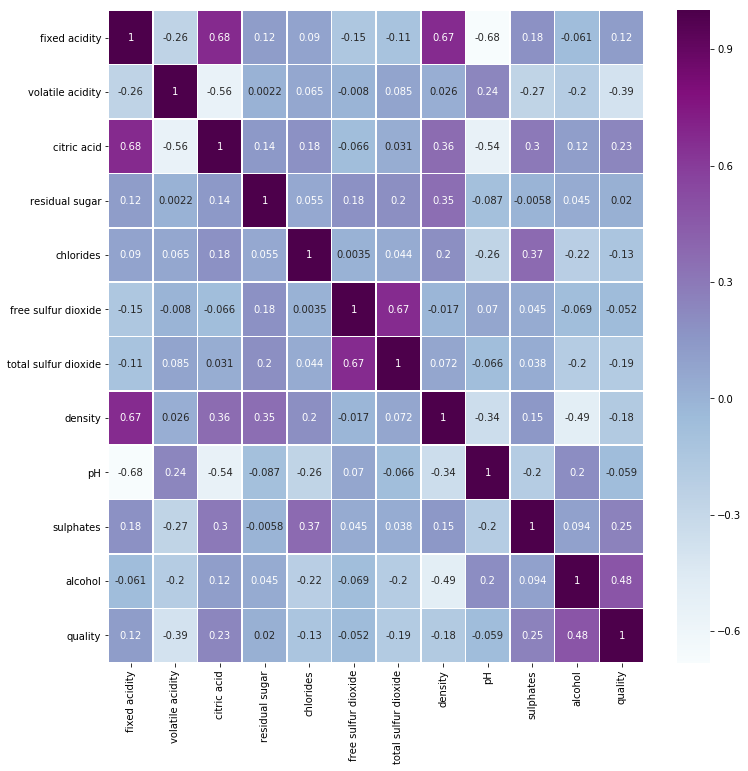

In [130]:
# Plot Seaborn Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),cmap="BuPu", annot=True, linewidths=0.5)

According to the heatmap above, we can say.
there is a high positive correlation between:
    fixed acidity ~ citric acid	
    fixed acidity ~ density
    free sulfur dioxide ~ total sulfur dioxide
    
there is a high negative correlation between: 
    fixed acidity ~ pH
    citric acid ~ volatile acidity
    
High correclations with quality are with 
    alcohol -> positive
    volatile acidity -> negative

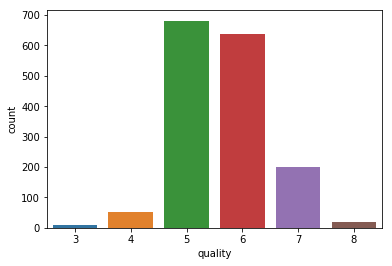

In [131]:
# If we analyse the data quality values.
sns.countplot(x='quality', data=data)

In [149]:
data['quality'] = pd.cut(data['quality'], bins = [1,6,10], labels = [0,1]).astype(int)

In [152]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,NaN,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,NaN,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


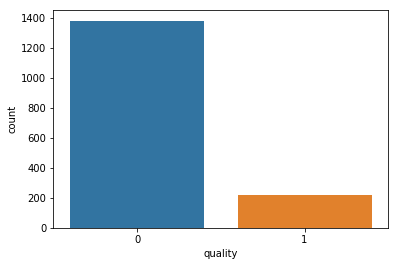

In [134]:
# Let's see how many wines are high quality
sns.countplot(x='quality', data=data)
plt.show()

In [135]:
#missing data info
data.isnull().sum()

fixed acidity           17
volatile acidity        30
citric acid             41
residual sugar          29
chlorides               29
free sulfur dioxide     17
total sulfur dioxide    13
density                 12
pH                      15
sulphates               13
alcohol                 10
quality                  0
dtype: int64

In [136]:
# imputing missing values with mean
from sklearn.preprocessing import Imputer

In [137]:
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(data)
imr.statistics_

array([ 8.32054362,  0.52792543,  0.27065469,  2.53442675,  0.08761465,
       15.8874842 , 46.44640605,  0.99674921,  3.31116793,  0.65763556,
       10.42470107,  0.13570982])

In [138]:
X = imr.transform(data)
data = pd.DataFrame(X, columns=data.columns,
                          index = list(data.index.values))
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700000,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.880000,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.760000,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.280000,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.0
4,7.4,0.700000,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
5,7.4,0.527925,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0
6,7.9,0.600000,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0.0
7,7.3,0.650000,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1.0
8,7.8,0.580000,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1.0
9,7.5,0.527925,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0.0


In [139]:
# Setting x and y before training data
y=data.quality.values
x=data.drop(["quality"],axis=1)

In [140]:
# Normalisation
# All the values of the features will be in range 0-1
x=((x-np.min(x)) / (np.max(x)-np.min(x)))
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.000000,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.050633,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.708861,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
5,0.247788,0.279401,0.000000,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846
6,0.292035,0.328767,0.075949,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846
7,0.238938,0.363014,0.000000,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154
8,0.283186,0.315068,0.025316,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231
9,0.256637,0.279401,0.455696,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077


In [141]:
# train - test split data
# split data , 80% of data to train and create model
# 20% data to test model
# Use sklearn library to prepare train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
# Use LogisticRegression function of sklearn
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [143]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
print(lr.predict(x_test))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [145]:
print("test accuracy {} %".format(lr.score(x_test,y_test)*100))

test accuracy 85.9375 %


Conclusion

I worked with Red Wine Dataset and applied logistic regression.
I analyzed data and got some correlations between wine quality and some features.
Then I did data preprocessing
 - replace missed values
 - normalize dataset
 - categorized quality scores as 0:Low/Normal Quality 1:High Quality .

I splitted 80% data for training and 20% data for testing.
By using Sklearn library, test score was calculated as 85.9375 %